In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# load data file
df = pd.read_csv('IntervalIDBase14Intersections.txt', delimiter=';')

In [179]:
# data cleaning
num_df = df.iloc[:,0:65].copy().replace('()',0).replace(to_replace=r'^(.*)$', value=1, regex=True)

df_all_edge_detection = pd.DataFrame(np.zeros((df.index[0], 32)))
for i in range(32):
    df_all_edge_detection.iloc[:,i] = num_df.iloc[:,2*i+1] + num_df.iloc[:,2*i+2]

df_traffic_light = pd.DataFrame(np.zeros((df.index[0], 8)))
for i in range(65,73):
    temp = df.iloc[:,i]/2    
    df_traffic_light.iloc[:,i-65] = temp.astype(int)
    
df_intersection_vehnum = pd.DataFrame(np.zeros((df.index[0], 16)))
for i in range(73,89):   
    df_intersection_vehnum.iloc[:,i-73] = df.iloc[:,i]
    
df_outIntersection_vehnum = pd.DataFrame(np.zeros((df.index[0], 16)))
for i in range(89,105):   
    df_outIntersection_vehnum.iloc[:,i-89] = df.iloc[:,i]
    
df_intersection_crowd_size = pd.DataFrame(np.zeros((df.index[0], 8)))
for i in range(8):
    df_intersection_crowd_size.iloc[:,i] = df.iloc[:,i+105]
    
# I2 to I9
df_intersection_down_crowd_size = pd.DataFrame(np.zeros((df.index[0], 8)))
for i in range(0,16,2):
    df_intersection_down_crowd_size.iloc[:,int(i/2)] = df_intersection_vehnum[i] + df_outIntersection_vehnum[i+1]

# I9 to I2
df_intersection_up_crowd_size = pd.DataFrame(np.zeros((df.index[0], 8)))
for i in range(15,-1,-2):
    df_intersection_up_crowd_size.iloc[:,int((15-i)/2)] = df_intersection_vehnum[i] + df_outIntersection_vehnum[i-1]

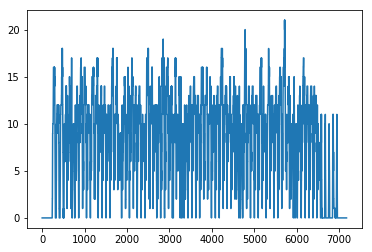

In [181]:
(df_intersection_down_crowd_size[0]+df_intersection_up_crowd_size[7]).plot()

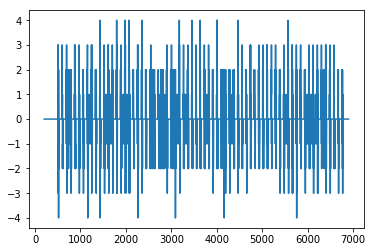

In [196]:
df_intersection_down_crowd_size[5][200:6900].diff().plot()

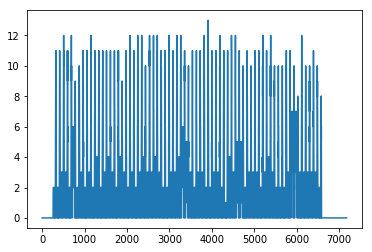

In [183]:
df_intersection_down_crowd_size[1].plot()

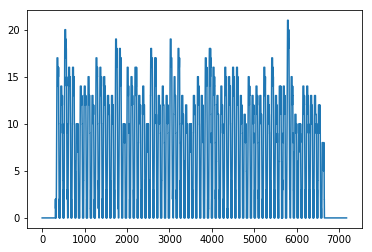

In [184]:
df_intersection_down_crowd_size[2].plot()

In [ ]:
crowdStratTime = 0
crowdFlag = 0
crowdEndTime = 0

for time, size in df_intersection_down_crowd_size[2].iteritems():
    if size != 0:
        if crowdFlag == 0:
            
        
        

In [162]:
# caculate the interval between vehicle crowd, all intersections  --V3.0

nums = range(0,32)
intervalList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3
crowdSizeList = []

for num in nums:
    interval = 0
    firstVehicleInterval = 0
    detectorInterval = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    crowdFlag = 0
    firstVehicleFlag = 0
    currentCrowdSizeList = []
    for key, value in df_all_edge_detection.iloc[:,num].iteritems(): 
        interval = interval + 1
        if value == 0:
            # not a crowd, just one or two vehicle
            if firstVehicleFlag == 1 and interval - firstVehicleInterval >= maxTimeIntervalInCrowd:
                currentCrowdSize = 0
                firstVehicleFlag = 0
                firstVehicleInterval = 0                        
            
            if interval == maxTimeIntervalInCrowd and crowdFlag == 1:
                currentCrowdSizeList.append(currentCrowdSize)
                crowdFlag = 0
                currentCrowdSize = 0

        else:
            currentCrowdSize = currentCrowdSize + 1        
            if currentCrowdSize >= minCrowdSize:            
                if crowdFlag == 0:
                    detectorInterval.append(firstVehicleInterval)
                    firstVehicleInterval = 0
                    firstVehicleFlag = 0
                crowdFlag = 1
                interval = 0
            elif currentCrowdSize == 1:
                if crowdFlag == 0:
                    firstVehicleInterval = interval
                    firstVehicleFlag = 1
            else:
                # if current 1< veh# < 3, interval still increase
                continue
    
    if crowdFlag == 1:
        currentCrowdSizeList.append(currentCrowdSize)
    
    intervalList.append(detectorInterval)
    crowdSizeList.append(currentCrowdSizeList)

Text(0, 0.5, 'Average Interarrival Time')

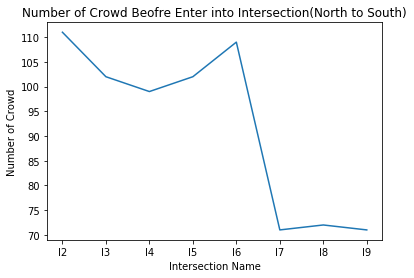

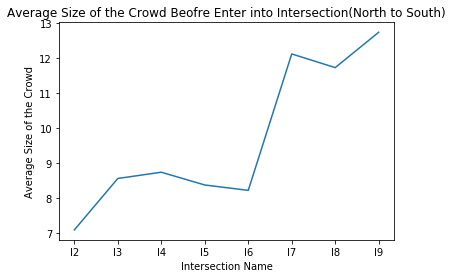

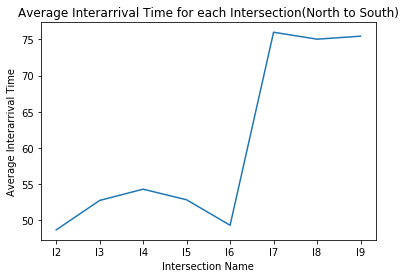

In [163]:
numOfCrowdAtEachIntersectionList = []
AvgSizeIfCrowdAtEachIntersectionList = []
AvgCrowdInterArrivalTimeList = []
for i in [0,2,4,6,8,10,12,14]:
    numOfCrowdAtThisIntersection = len(crowdSizeList[i])
    SumOfintervalAtThisIntersection = sum(intervalList[i][1:])
    TotalSizeOfCrowdAtThisIntersection = sum(crowdSizeList[i])
    numOfCrowdAtEachIntersectionList.append(numOfCrowdAtThisIntersection)
    AvgSizeIfCrowdAtEachIntersectionList.append(TotalSizeOfCrowdAtThisIntersection/numOfCrowdAtThisIntersection)
    AvgCrowdInterArrivalTimeList.append(SumOfintervalAtThisIntersection/(numOfCrowdAtThisIntersection-1))
    
IntersectionNames = ['I2','I3','I4','I5','I6','I7','I8','I9']    
plt.figure()
plt.plot(IntersectionNames,numOfCrowdAtEachIntersectionList)
plt.title("Number of Crowd Beofre Enter into Intersection(North to South)")
plt.xlabel('Intersection Name')
plt.ylabel('Number of Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgSizeIfCrowdAtEachIntersectionList)
plt.title("Average Size of the Crowd Beofre Enter into Intersection(North to South)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Size of the Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgCrowdInterArrivalTimeList)
plt.title("Average Interarrival Time for each Intersection(North to South)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Interarrival Time')

Text(0, 0.5, 'Average Interarrival Time')

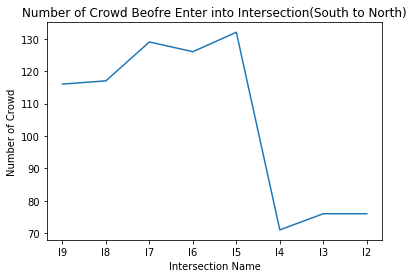

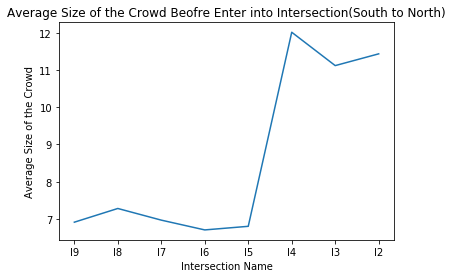

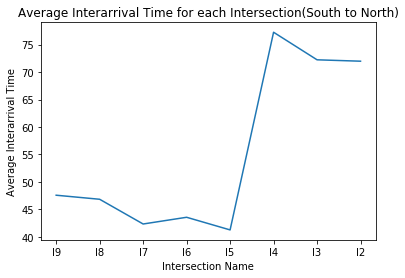

In [164]:
numOfCrowdAtEachIntersectionList = []
AvgSizeIfCrowdAtEachIntersectionList = []
AvgCrowdInterArrivalTimeList = []
for i in [15,13,11,9,7,5,3,1]:
    numOfCrowdAtThisIntersection = len(crowdSizeList[i])
    SumOfintervalAtThisIntersection = sum(intervalList[i][1:])
    TotalSizeOfCrowdAtThisIntersection = sum(crowdSizeList[i])
    numOfCrowdAtEachIntersectionList.append(numOfCrowdAtThisIntersection)
    AvgSizeIfCrowdAtEachIntersectionList.append(TotalSizeOfCrowdAtThisIntersection/numOfCrowdAtThisIntersection)
    AvgCrowdInterArrivalTimeList.append(SumOfintervalAtThisIntersection/(numOfCrowdAtThisIntersection-1))
    
IntersectionNames = ['I9','I8','I7','I6','I5','I4','I3','I2']    
plt.figure()
plt.plot(IntersectionNames,numOfCrowdAtEachIntersectionList)
plt.title("Number of Crowd Beofre Enter into Intersection(South to North)")
plt.xlabel('Intersection Name')
plt.ylabel('Number of Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgSizeIfCrowdAtEachIntersectionList)
plt.title("Average Size of the Crowd Beofre Enter into Intersection(South to North)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Size of the Crowd')
plt.figure()
plt.plot(IntersectionNames,AvgCrowdInterArrivalTimeList)
plt.title("Average Interarrival Time for each Intersection(South to North)")
plt.xlabel('Intersection Name')
plt.ylabel('Average Interarrival Time')

In [165]:
# the following is to caculate the link delay
# up and down link
detectorDownNameList = ["e1Detector_E12_0_0","e1Detector_E12_1_1","e1Detector_E23_0_4","e1Detector_E23_1_5",
                        "e1Detector_E34_0_8","e1Detector_E34_1_9","e1Detector_E45_0_12","e1Detector_E45_1_13",
                        "e1Detector_E56_0_16","e1Detector_E56_1_17","e1Detector_E67_0_20","e1Detector_E67_1_21",
                        "e1Detector_E78_0_24","e1Detector_E78_1_25","e1Detector_E89_0_28","e1Detector_E89_1_29"]
detectorUpNameList = ["e1Detector_E09_1_30","e1Detector_E09_0_31","e1Detector_E98_1_26","e1Detector_E98_0_27",
                      "e1Detector_E87_1_22","e1Detector_E87_0_23","e1Detector_E76_1_18","e1Detector_E76_0_19",
                      "e1Detector_E65_1_14","e1Detector_E65_0_15","e1Detector_E54_1_10","e1Detector_E54_0_11",
                      "e1Detector_E43_1_6","e1Detector_E43_0_7","e1Detector_E32_1_2","e1Detector_E32_0_3"]
detectorOutDownNameList = ["out_e1Detector_E23_0_4","out_e1Detector_E23_1_5","out_e1Detector_E34_0_8","out_e1Detector_E34_1_9",
                           "out_e1Detector_E45_0_12","out_e1Detector_E45_1_13","out_e1Detector_E56_0_16","out_e1Detector_E56_1_17",
                           "out_e1Detector_E67_0_20","out_e1Detector_E67_1_21","out_e1Detector_E78_0_24","out_e1Detector_E78_1_25",
                           "out_e1Detector_E89_0_28","out_e1Detector_E89_1_29","out_e1Detector_E90_1_30","out_e1Detector_E90_0_31"]
detectorOutUpNameList = ["out_e1Detector_E98_1_26","out_e1Detector_E98_0_27","out_e1Detector_E87_1_22","out_e1Detector_E87_0_23",
                         "out_e1Detector_E76_1_18","out_e1Detector_E76_0_19","out_e1Detector_E65_1_14","out_e1Detector_E65_0_15",
                         "out_e1Detector_E54_1_10","out_e1Detector_E54_0_11","out_e1Detector_E43_1_6","out_e1Detector_E43_0_7",
                         "out_e1Detector_E32_1_2","out_e1Detector_E32_0_3","out_e1Detector_E21_0_0","out_e1Detector_E21_1_1"]

carIDFile = open('carIDFile14Intersections.txt', "r")
for line in carIDFile:
    carIDList = line.split(",")
carIDFile.close() 

carDownIDList = []
carUpIDList = []
for carID in carIDList:
    if carID[0] == "u":
        carUpIDList.append(carID)
    else:
        carDownIDList.append(carID)

In [166]:
# caculate vehicle delay, v2.0
df_ID_DownEdge_Time = pd.DataFrame(columns =  ["carID", "DownEdge", "Timestamp"])
i = 0
for carID in carDownIDList:
    for edge in detectorDownNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_DownEdge_Time.loc[i] = [carID,edge[11:14],index]
                i = i + 1
                break

In [167]:
df_ID_UpEdge_Time = pd.DataFrame(columns =  ["carID", "UpEdge", "Timestamp"])
i = 0
for carID in carUpIDList:
    for edge in detectorUpNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_UpEdge_Time.loc[i] = [carID,edge[11:14],index]
                i = i + 1
                break

In [168]:
df_ID_DownOutEdge_Time = pd.DataFrame(columns =  ["carID", "DownEdge", "Timestamp"])
i = 0
for carID in carDownIDList:
    for edge in detectorOutDownNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_DownOutEdge_Time.loc[i] = [carID,edge[15:18],index]
                i = i + 1
                break

In [169]:
df_ID_UpOutEdge_Time = pd.DataFrame(columns =  ["carID", "UpEdge", "Timestamp"])
i = 0
for carID in carUpIDList:
    for edge in detectorOutUpNameList:
        for index, item in df[edge].iteritems():
            if "'"+carID+"'" in item:
                df_ID_UpOutEdge_Time.loc[i] = [carID,edge[15:18],index]
                i = i + 1
                break

In [66]:
df_ID_DownEdge_delay = pd.DataFrame(columns =  ["carID", "DownEdge", "delay"])
i = 0
for index, row in df_ID_DownEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_DownEdge_delay.loc[i] = [row['carID'],row['DownEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [70]:
df_ID_UpEdge_delay = pd.DataFrame(columns =  ["carID", "UpEdge", "delay"])
i = 0
for index, row in df_ID_UpEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_UpEdge_delay.loc[i] = [row['carID'],row['UpEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [71]:
df_ID_DownOutEdge_delay = pd.DataFrame(columns =  ["carID", "DownEdge", "delay"])
i = 0
for index, row in df_ID_DownOutEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_DownOutEdge_delay.loc[i] = [row['carID'],row['DownEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [72]:
df_ID_UpOutEdge_delay = pd.DataFrame(columns =  ["carID", "UpEdge", "delay"])
i = 0
for index, row in df_ID_UpOutEdge_Time.iterrows():
    if index%8 == 0:
        upStreamEdgeTimestamp = row['Timestamp']
    else:        
        downStreamEdgeTimestamp = row['Timestamp']
        df_ID_UpOutEdge_delay.loc[i] = [row['carID'],row['UpEdge'],downStreamEdgeTimestamp-upStreamEdgeTimestamp]
        i = i + 1
        upStreamEdgeTimestamp = row['Timestamp']

In [77]:
df_ID_UpOutEdge_delay[df_ID_UpOutEdge_delay["carID"] == "up_1908"]

,carID,UpEdge,delay
6727,up_1908,E87,30
6728,up_1908,E76,62
6729,up_1908,E65,31
6730,up_1908,E54,67
6731,up_1908,E43,30
6732,up_1908,E32,61
6733,up_1908,E21,24


In [78]:
df_ID_UpEdge_delay[df_ID_UpEdge_delay["carID"] == "up_1908"]

,carID,UpEdge,delay
6727,up_1908,E98,74
6728,up_1908,E87,17
6729,up_1908,E76,75
6730,up_1908,E65,66
6731,up_1908,E54,31
6732,up_1908,E43,23
6733,up_1908,E32,62


In [79]:
df_ID_DownOutEdge_delay[df_ID_DownOutEdge_delay["carID"] == "down_1909"]

,carID,DownEdge,delay
6629,down_1909,E34,25
6630,down_1909,E45,66
6631,down_1909,E56,31
6632,down_1909,E67,66
6633,down_1909,E78,29
6634,down_1909,E89,63
6635,down_1909,E90,29


In [80]:
df_ID_DownEdge_delay[df_ID_DownEdge_delay["carID"] == "down_1909"]

,carID,DownEdge,delay
6629,down_1909,E23,71
6630,down_1909,E34,23
6631,down_1909,E45,74
6632,down_1909,E56,66
6633,down_1909,E67,29
6634,down_1909,E78,17
6635,down_1909,E89,75


In [86]:
df.columns[1 + 16*2]

'out_e1Detector_E21_0_0'

In [ ]:
# caculate the interval and delay between vehicle crowd, all intersections  --V4.0

detectorNums = range(0,32)
intervalList = []
minCrowdSize = 3
maxTimeIntervalInCrowd = 3
crowdSizeList = []
DelayList = []

for detectorNum in detectorNums:
    interval = 0
    firstVehicleInterval = 0
    detectorInterval = []
    currentTimeIntervalInCrowd = 0
    currentCrowdSize = 0
    currentIntersectionDelayList = []
    currentCrowdDelayList = []    
    crowdFlag = 0
    firstVehicleFlag = 0
    currentCrowdSizeList = []
    
    for key, value in df_all_edge_detection.iloc[:,detectorNum].iteritems(): 
        interval = interval + 1
        if value == 0:
            # not a crowd, just one or two vehicle
            if firstVehicleFlag == 1 and interval - firstVehicleInterval >= maxTimeIntervalInCrowd:
                currentCrowdSize = 0
                firstVehicleFlag = 0
                firstVehicleInterval = 0                        
            
            if interval == maxTimeIntervalInCrowd and crowdFlag == 1:
                # caculate current crowd size & delay. As for crowd Delay, average of all vehicle
                currentCrowdSizeList.append(currentCrowdSize)
                currentIntersectionDelayList.append(int(np.mean(crowdDelayList)))
                crowdFlag = 0
                currentCrowdSize = 0

        else:
            currentCrowdSize = currentCrowdSize + 1
            
            #drive in, down, first detector is the first
            if detectorNum in [0,2,4,6,8,10,12,14]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_DownEdge_delay['delay'][df_ID_DownEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
            #drive in, up, first detector is the last
            elif detectorNum in [1,3,5,7,9,11,13,15]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_UpEdge_delay['delay'][df_ID_UpEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
            #drive out, down, first detector is the first
            elif detectorNum in [18,20,22,24,26,28,30,31]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_DownOutEdge_delay['delay'][df_ID_DownOutEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
            #drive out, up, first detector is the last
            elif detectorNum in [16,17,19,21,23,25,27,29]:
                for i in range(2):
                    name = df.columns[2*detectorNum+i+1]
                    if not df[name][key] == '()':
                        vehicleID = df[name][key][2:-3]
                        currentDelay = int(df_ID_UpOutEdge_delay['delay'][df_ID_UpOutEdge_delay['carID'] == vehicleID])
                        #crowdDelayList.append(currentDelay)
                        
                        
            if currentCrowdSize >= minCrowdSize:            
                if crowdFlag == 0:
                    detectorInterval.append(firstVehicleInterval)
                    firstVehicleInterval = 0
                    firstVehicleFlag = 0
                crowdFlag = 1
                interval = 0
            elif currentCrowdSize == 1:
                if crowdFlag == 0:
                    firstVehicleInterval = interval
                    firstVehicleFlag = 1
            else:
                # if current 1< veh# < 3, interval still increase
                continue
    
    if crowdFlag == 1:
        currentCrowdSizeList.append(currentCrowdSize)
    
    intervalList.append(detectorInterval)
    crowdSizeList.append(currentCrowdSizeList)